In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
population= pd.read_csv('Employee_monthly_salary.csv')
population

,EmpID,Name,Gender,Date_of_Birth,Age,Join_Date,Tenure_in_org_in_months,GROSS,Net_Pay,Deduction,Deduction_percentage,Designation,Department
0,19575,Keven Norman,M,3/9/94,25,2/12/19,7,74922,71494,3428,4.58,Product Operations Analyst.Associate.,IT Product Management & Ops
1,19944,Kristin Werner,F,23/06/1994,26,13/01/2020,6,44375,39971,4404,9.92,Platform Operations Engineer.Associate.,Platform Operations
2,20055,Avery Barber,M,27/02/1996,24,14/11/2019,8,82263,77705,4558,5.54,Platform Operations Engineer.Associate.,Platform Operations
3,20058,Boris Gibson,M,29/09/1993,26,13/01/2020,6,44375,40164,4211,9.49,Platform Operations Engineer.Associate.,Platform Operations
4,20332,Leif Mack,M,1/5/91,29,4/6/18,25,235405,143963,91442,38.84,Software Engineer.Senior.,Enterprise Access Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,18835,Darius Wilkerson,M,14/01/1991,29,21/08/2017,34,88934,88734,200,0.22,Technical Solutions Engineer..,AmaTec - EMEA TSE
1798,19066,Erick Ballard,M,29/08/1992,27,25/09/2017,33,133224,133024,200,0.15,Software Engineer II..,GSS EPIC Engineering (HC COGS)
1799,21644,Lawerence Downs,M,5/7/91,29,1/4/19,15,72547,71246,1301,1.79,Business Operations Analyst..,Marketing - Operations
1800,19673,Abdul Watkins,M,19/08/1972,47,26/12/2017,30,227176,220778,6398,2.82,Manager..Account Management,Americas- AMG


Population Mean
---------------
175826.6448390677


Text(0, 0.5, 'Probability Density')

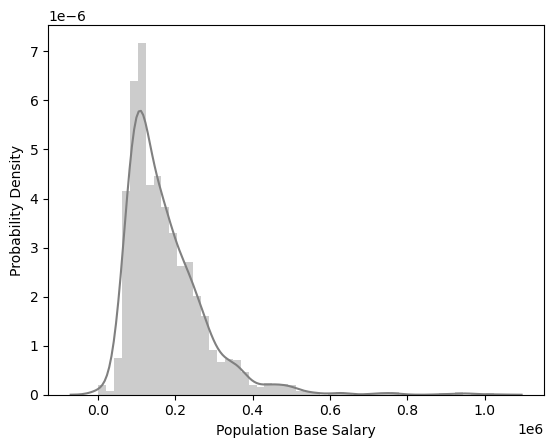

In [2]:
population_base_salary = population['GROSS']
print("Population Mean")
print("---------------")
print(population_base_salary.mean())
sns.distplot(population_base_salary, color='grey')
plt.xlabel('Population Base Salary')
plt.ylabel('Probability Density')

In [3]:
mean = []
def calc_sample_mean(sample_size, no_of_sample_means):
    for i in range(no_of_sample_means):        
        sample_base_salary = population_base_salary.sample(n=sample_size)
        sample_mean=sample_base_salary.mean()
        mean.append(sample_mean)
    return mean

Text(0, 0.5, 'Probability Density')

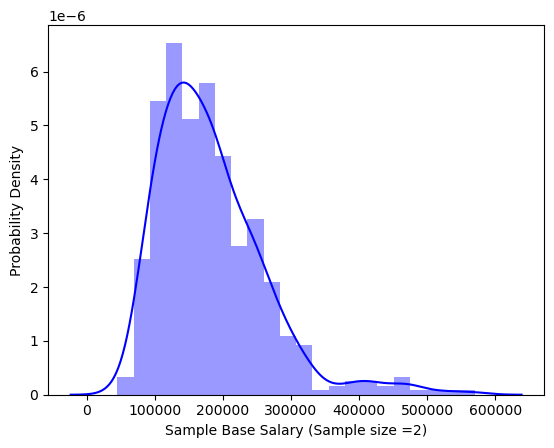

In [4]:
mean_2=calc_sample_mean(sample_size=2, no_of_sample_means=500)
sns.distplot(mean_2, color='b')
plt.xlabel('Sample Base Salary (Sample size =2)')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

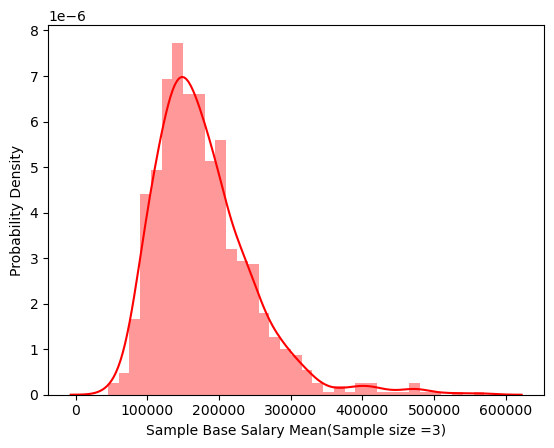

In [5]:
mean_3=calc_sample_mean(sample_size=3, no_of_sample_means=500)
sns.distplot(mean_3, color='r')
plt.xlabel('Sample Base Salary Mean(Sample size =3)')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

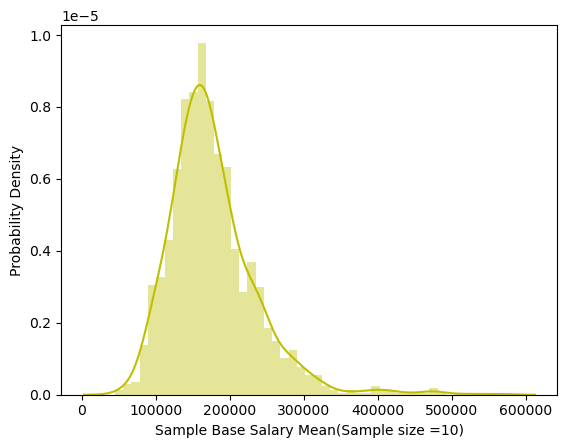

In [6]:
mean_10=calc_sample_mean(sample_size=10, no_of_sample_means=500)
sns.distplot(mean_10, color='y')
plt.xlabel('Sample Base Salary Mean(Sample size =10)')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

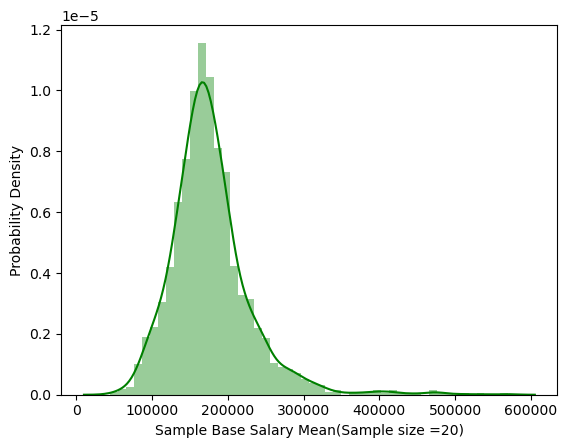

In [7]:
mean_20=calc_sample_mean(sample_size=20, no_of_sample_means=500)
sns.distplot(mean_20, color='g')
plt.xlabel('Sample Base Salary Mean(Sample size =20)')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

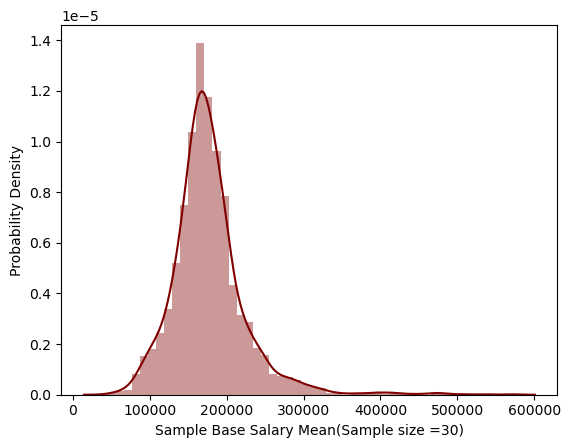

In [8]:
mean_30=calc_sample_mean(sample_size=30, no_of_sample_means=500)
sns.distplot(mean_30, color='maroon')
plt.xlabel('Sample Base Salary Mean(Sample size =30)')
plt.ylabel('Probability Density')

In [10]:
# Import the libraries
from scipy import stats
import pingouin as pg

# Define the sample data and the population mean
data = [1, 2, 3, 4, 5]
popmean = 3.5

# Perform the one-sample t-test using scipy
t, p = stats.ttest_1samp(data, popmean)
print('t = {:.4f}, p = {:.4f}'.format(t, p))

# Perform the one-sample t-test using pingouin
df = pg.ttest(data, popmean)
print(df)

t = -0.7071, p = 0.5185
               T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -0.707107    4   two-sided  0.518519  [1.04, 4.96]  0.316228  0.484   

           power  
T-test  0.085879  


In [11]:
# Import the libraries
from scipy import stats
from statsmodels.stats import weightstats
import pingouin as pg

# Define the sample data for two groups
group1 = [1, 2, 3, 4, 5]
group2 = [6, 7, 8, 9, 10]

# Perform the two-sample t-test using scipy
t, p = stats.ttest_ind(group1, group2)
print('t = {:.4f}, p = {:.4f}'.format(t, p))

# Perform the two-sample t-test using statsmodels
t, p, df = weightstats.ttest_ind(group1, group2)
print('t = {:.4f}, p = {:.4f}, df = {:.4f}'.format(t, p, df))

# Perform the two-sample t-test using pingouin
df = pg.ttest(group1, group2)
print(df)

t = -5.0000, p = 0.0011
t = -5.0000, p = 0.0011, df = 8.0000
          T  dof alternative     p-val           CI95%   cohen-d   BF10  \
T-test -5.0    8   two-sided  0.001053  [-7.31, -2.69]  3.162278  26.26   

          power  
T-test  0.99135  


Mean Reaction Time: 603.08
Standard Deviation of Reaction Time: 498.69
Outliers detected:
     Reaction_Time   Z_Score
11           1600  1.999092
12           1700  2.199618


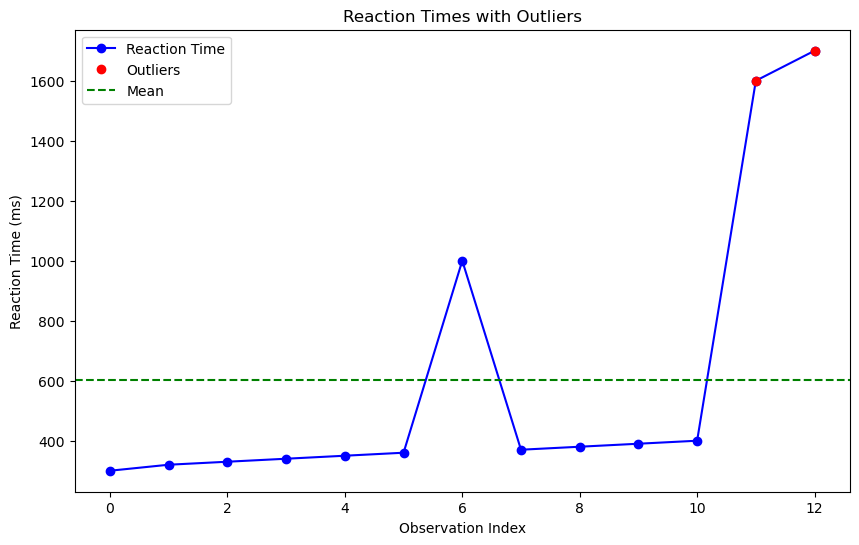

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Reaction times in milliseconds (including clear outliers)
reaction_times = [300, 320, 330, 340, 350, 360, 1000, 370, 380, 390, 400, 1600, 1700]

# Create a DataFrame
df_rt = pd.DataFrame(reaction_times, columns=['Reaction_Time'])

# Calculate basic statistics
mean_rt = df_rt['Reaction_Time'].mean()
std_rt = df_rt['Reaction_Time'].std()

print(f"Mean Reaction Time: {mean_rt:.2f}")
print(f"Standard Deviation of Reaction Time: {std_rt:.2f}")

# Identify outliers using the Z-score method with a threshold of 2
df_rt['Z_Score'] = (df_rt['Reaction_Time'] - mean_rt) / std_rt
outliers = df_rt[df_rt['Z_Score'].abs() > 1]
print("Outliers detected:\n", outliers)

# Visualize the reaction times with outliers
plt.figure(figsize=(10, 6))

# Plot all data points
plt.plot(df_rt['Reaction_Time'], marker='o', linestyle='-', color='blue', label='Reaction Time')

# Highlight the outliers in red
plt.plot(outliers.index, outliers['Reaction_Time'], marker='o', linestyle='', color='red', label='Outliers')

# Add mean line
plt.axhline(y=mean_rt, color='green', linestyle='--', label='Mean')

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('Reaction Time (ms)')
plt.title('Reaction Times with Outliers')

# Add legend
plt.legend()

# Show plot
plt.show()



In [16]:
reaction_times = pd.Series(reaction_times)
Q1 = reaction_times.quantile(0.25)
Q3 = reaction_times.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)
print("Interquartile Range (IQR):", IQR)
# Define the outlier cutoff thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = reaction_times[(reaction_times < lower_bound) | (reaction_times > upper_bound)]

print("Outliers:", outliers.tolist())

First Quartile (Q1): 340.0
Third Quartile (Q3): 400.0
Interquartile Range (IQR): 60.0
Outliers: [1000, 1600, 1700]


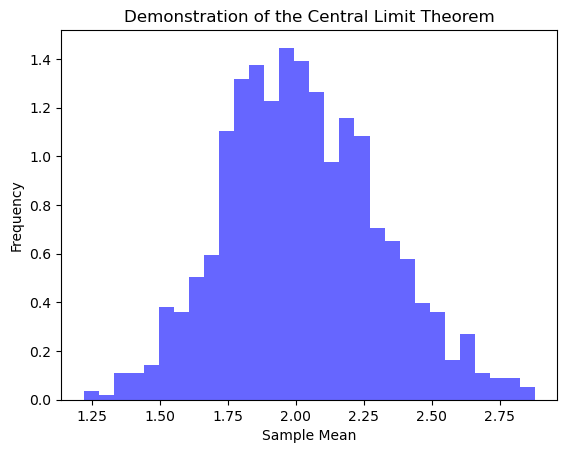

In [18]:
# Demonstration of CLT
import numpy as np
population = np.random.exponential(scale=2, size=10000)
sample_means = [np.mean(np.random.choice(population, size=50)) for _ in range(1000)]

# Plotting
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b')
plt.title('Demonstration of the Central Limit Theorem')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

In [21]:
import scipy.stats as stats

# Sample data
sample = np.random.normal(loc=50, scale=10, size=30)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Confidence Interval
confidence_level = 0.95
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(sample)
print(f"95% Confidence Interval: {confidence_interval}")

[54.10080627 42.4255795  39.70617955 41.19074454 33.73992778 33.93593165
 35.56967087 44.76023853 47.71815465 52.74755395 49.95035363 62.51970108
 46.07430254 38.63300619 44.11283872 62.9224006  41.72151569 52.97242469
 48.51202472 39.76185039 34.5413211  46.54651916 40.23501205 52.02239184
 62.59160357 53.59578398 64.0595857  44.74392995 46.7586215  50.7484055 ]
95% Confidence Interval: (43.848830553606696, 50.079061437764146)


In [22]:
# Example: One-sample t-test
from scipy.stats import ttest_1samp

# Sample data
sample = np.random.normal(loc=50, scale=10, size=30)

# Null hypothesis: mean = 50
print(sample)
t_stat, p_value = ttest_1samp(sample, 50)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

[54.05713546 36.30021928 56.46450807 74.05928584 44.3491661  41.48483197
 71.8948604  45.23462565 45.6262054  54.35918547 32.95872996 43.23234386
 54.50914321 40.39415312 43.89070532 49.83421252 36.80104174 61.1436595
 40.99271623 57.69498258 48.86359899 55.03290429 52.55592197 72.33348507
 55.21597104 64.99297035 46.04556465 42.25453942 45.85023249 42.19777013]
t-statistic: 0.1810698494697539, p-value: 0.8575723157018977


In [23]:
from scipy.stats import ttest_ind

# Sample data
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)

# Two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -2.4382516187732763, p-value: 0.017842561003413682


In [24]:
from scipy.stats import chi2_contingency

# Example data (contingency table)
observed = np.array([[10, 20, 30], [6, 9, 17]])

# Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

Chi-Square Statistic: 0.27157465150403504, p-value: 0.873028283380073
